# 📈 Simple Linear Regression - Complete Beginner's Guide

Welcome to your first machine learning model! This notebook will take you through **Simple Linear Regression** step by step, explaining not just *how* to do it, but *why* we do each step.

## 🎯 What You'll Learn

By the end of this notebook, you'll understand:
- **What is Simple Linear Regression?** (The math and intuition)
- **When to use it** (Problem types and assumptions)
- **How to implement it** (Step-by-step Python code)  
- **How to evaluate it** (Is our model any good?)
- **How to interpret results** (What do the numbers mean?)

## 🧠 The Big Picture

**The Problem:** Can we predict someone's salary based on their years of experience?

**The Solution:** Find the "best line" through our data points that allows us to make predictions for new data.

**Real-World Application:** HR departments use this to set fair salary ranges, employees can estimate their market value, and companies can budget for hiring.

---

## 📚 What is Simple Linear Regression?

### **The Intuition**
Imagine you're trying to draw the "best" straight line through a scatter plot of data points. That line represents the relationship between two variables.

### **The Math Behind It**
The equation of our line is: **y = mx + b**

In machine learning terms:
- **y** = Predicted Salary (what we want to predict)
- **x** = Years of Experience (what we use to predict)
- **m** = Slope (how much salary increases per year of experience)
- **b** = Intercept (starting salary with 0 years experience)

### **How Does the Computer Find the "Best" Line?**
The algorithm tries millions of different lines and picks the one that minimizes the **total error** between predicted and actual values. This process is called **"fitting the model"**.

---

## 🛠️ Step-by-Step Process

1. **📊 Import Libraries & Load Data**
2. **🔍 Explore the Data (EDA)**
3. **🧹 Clean the Data** 
4. **✂️ Split Training & Test Sets**
5. **🎓 Train the Model**
6. **🔮 Make Predictions**
7. **📏 Evaluate Performance**
8. **📈 Visualize Results**
9. **🔬 Diagnose Issues (Residual Analysis)**
10. **💡 Interpret & Apply**

## 📊 Step 1: Import Libraries

**Why do we need libraries?**
- **pandas**: Think of it as "Excel for Python" - handles data tables
- **numpy**: Super-fast math operations (computers love numbers!)
- **matplotlib**: Creates charts and graphs
- **scikit-learn**: The machine learning toolkit (models, evaluation, etc.)

**Pro Tip:** These are the "Swiss Army knife" of data science - you'll use them in almost every project!

In [4]:
# Import the essential libraries for our regression analysis
import pandas as pd           # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization  
import numpy as np           # Mathematical operations
import seaborn as sns        # Enhanced statistical visualizations

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🎯 Ready to start our machine learning journey!")

✅ Libraries imported successfully!
🎯 Ready to start our machine learning journey!


## 📂 Step 2: Load and Explore the Dataset

**What are we working with?**
This dataset contains salary information for different levels of work experience. It's perfect for learning linear regression because:
- **Simple**: Only 2 variables (experience and salary)
- **Clear relationship**: More experience typically = higher salary
- **Real-world relevant**: Everyone understands jobs and salaries!

**The Dataset:**
- **YearsExperience**: How many years someone has worked (our input/feature)
- **Salary**: How much someone earns (our target/what we want to predict)

### 🔍 Loading the Data

**What happens in this step:**
1. **Read the CSV file** into a pandas DataFrame (think of it as a spreadsheet)
2. **Separate features from target**: 
   - **Features (X)**: What we use to make predictions (Years of Experience)
   - **Target (y)**: What we want to predict (Salary)

**Key Concept:** In machine learning, we always separate input (X) from output (y)!

In [5]:
# Load the dataset
dataset = pd.read_csv('../data/salary_data.csv')

## 🔍 Step 3: Exploratory Data Analysis (EDA)

**Why do EDA?**
Before building any model, we need to understand our data! EDA helps us:
- **Spot patterns**: Is there really a relationship between experience and salary?
- **Find issues**: Missing values, outliers, weird distributions
- **Get intuition**: What should we expect from our model?

**What we'll explore:**
1. **Data distributions**: How are our variables spread out?
2. **Relationships**: How do experience and salary relate to each other?
3. **Data quality**: Any issues we need to fix?

**Think of it like:** Meeting someone new - you ask questions to understand them before becoming friends!

In [6]:
# Let's first look at our data
print("📋 Dataset Overview:")
print(f"Shape: {dataset.shape} (rows, columns)")
print("\n📊 First 5 rows:")
display(dataset.head())

print("\n📈 Basic Statistics:")
display(dataset.describe())

print("\n🔍 Data Types:")
print(dataset.dtypes)

print("\n❓ Any Missing Values?")
print(dataset.isnull().sum())

# Separate features (X) and target (y)
X = dataset.iloc[:, :-1]  # All rows, all columns except the last one (Features)
y = dataset.iloc[:, -1]   # All rows, only the last column (Target)

print(f"\n✅ Data loaded successfully!")
print(f"📊 Features (X): {X.shape} - Years of Experience")
print(f"🎯 Target (y): {y.shape} - Salary")

📋 Dataset Overview:
Shape: (30, 2) (rows, columns)

📊 First 5 rows:


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0



📈 Basic Statistics:


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000



🔍 Data Types:
YearsExperience    float64
Salary             float64
dtype: object

❓ Any Missing Values?
YearsExperience    0
Salary             0
dtype: int64

✅ Data loaded successfully!
📊 Features (X): (30, 1) - Years of Experience
🎯 Target (y): (30,) - Salary


🔍 EXPLORATORY DATA ANALYSIS


C:\Users\Morobang\AppData\Local\Temp\ipykernel_8876\3780143126.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Morobang\AppData\Local\Temp\ipykernel_8876\3780143126.py:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Morobang\AppData\Local\Temp\ipykernel_8876\3780143126.py:28: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Morobang\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Morobang\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Morobang\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: User

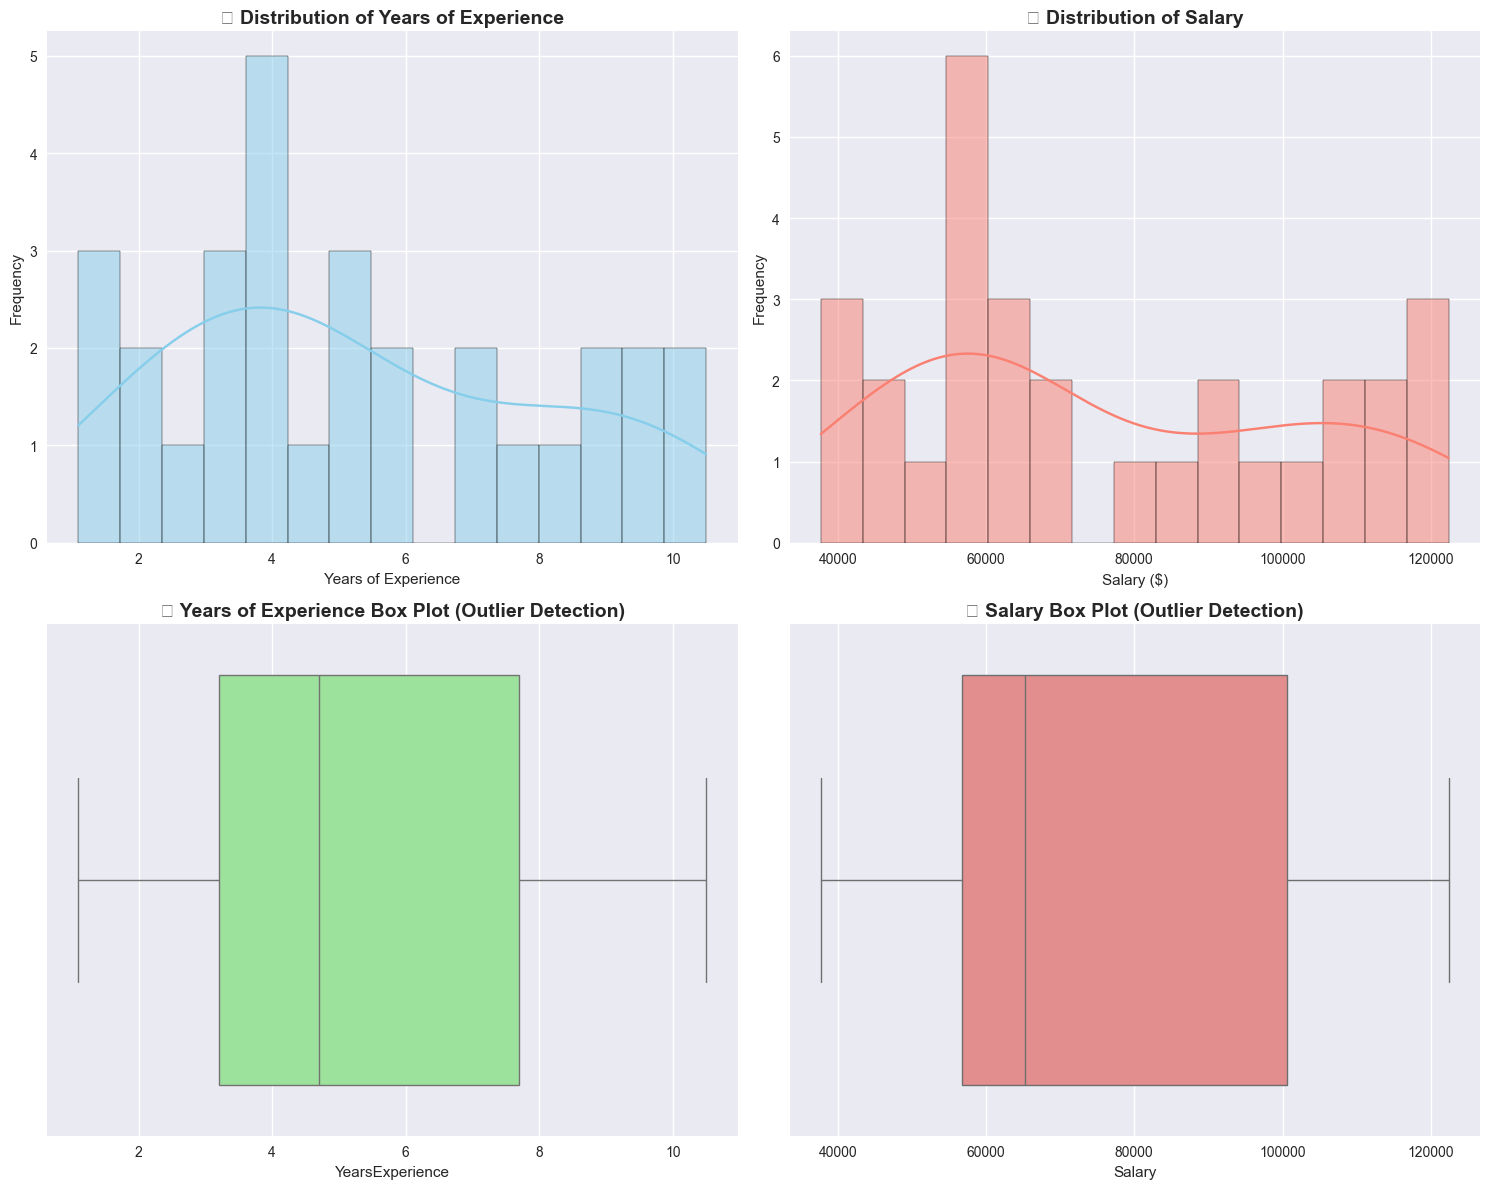


📈 RELATIONSHIP ANALYSIS
🔗 Correlation between Experience and Salary: 0.9782
💡 Strong positive correlation! More experience = higher salary


C:\Users\Morobang\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


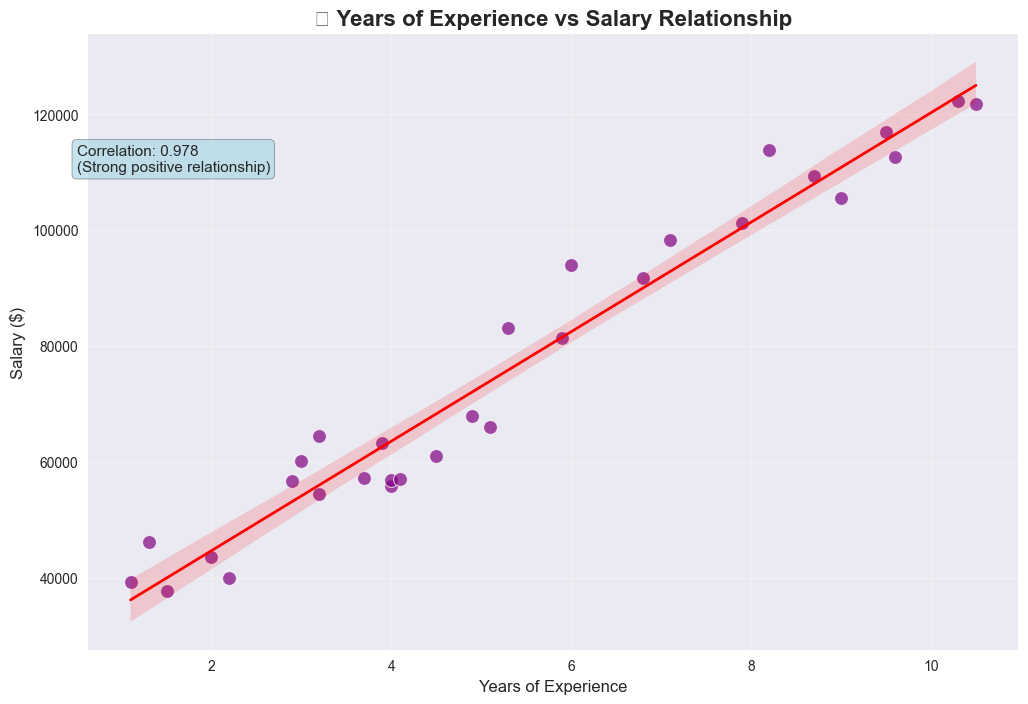


📊 DETAILED STATISTICS

YEARSEXPERIENCE:
  Mean: 5.31
  Median: 4.70
  Min: 1.10
  Max: 10.50
  Standard Deviation: 2.84

SALARY:
  Mean: 76003.00
  Median: 65237.00
  Min: 37731.00
  Max: 122391.00
  Standard Deviation: 27414.43

✅ EDA Complete! Key Insights:
   📈 Dataset has 30 employees
   💼 Experience ranges from 1.1 to 10.5 years
   💰 Salary ranges from $37,731 to $122,391
   🔗 Strong correlation (0.978) suggests linear regression will work well!


In [7]:
# 📊 Comprehensive Exploratory Data Analysis (EDA)

print("🔍 EXPLORATORY DATA ANALYSIS")
print("="*50)

# 1. Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Years of Experience Distribution
sns.histplot(dataset['YearsExperience'], kde=True, ax=axes[0,0], color='skyblue', bins=15)
axes[0,0].set_title('📊 Distribution of Years of Experience', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Years of Experience')
axes[0,0].set_ylabel('Frequency')

# Salary Distribution  
sns.histplot(dataset['Salary'], kde=True, ax=axes[0,1], color='salmon', bins=15)
axes[0,1].set_title('💰 Distribution of Salary', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Salary ($)')
axes[0,1].set_ylabel('Frequency')

# Box plots for outlier detection
sns.boxplot(x=dataset['YearsExperience'], ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('📦 Years of Experience Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')

sns.boxplot(x=dataset['Salary'], ax=axes[1,1], color='lightcoral')
axes[1,1].set_title('📦 Salary Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Relationship Analysis
print("\n📈 RELATIONSHIP ANALYSIS")
print("="*30)

# Calculate correlation
correlation = dataset['YearsExperience'].corr(dataset['Salary'])
print(f"🔗 Correlation between Experience and Salary: {correlation:.4f}")

if correlation > 0.8:
    print("💡 Strong positive correlation! More experience = higher salary")
elif correlation > 0.5:
    print("💡 Moderate positive correlation - there's a clear relationship")
else:
    print("💡 Weak correlation - relationship might not be linear")

# 3. Scatter Plot with Trend Line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='YearsExperience', y='Salary', data=dataset, 
               s=100, alpha=0.7, color='purple')

# Add a trend line to visualize the relationship
sns.regplot(x='YearsExperience', y='Salary', data=dataset, 
           scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('💼 Years of Experience vs Salary Relationship', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations for interpretation
plt.text(0.5, max(dataset['Salary'])*0.9, 
         f'Correlation: {correlation:.3f}\n(Strong positive relationship)', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
         fontsize=11)

plt.show()

# 4. Summary Statistics Breakdown
print("\n📊 DETAILED STATISTICS")
print("="*25)

for column in dataset.columns:
    print(f"\n{column.upper()}:")
    print(f"  Mean: {dataset[column].mean():.2f}")
    print(f"  Median: {dataset[column].median():.2f}")
    print(f"  Min: {dataset[column].min():.2f}")
    print(f"  Max: {dataset[column].max():.2f}")
    print(f"  Standard Deviation: {dataset[column].std():.2f}")

print("\n✅ EDA Complete! Key Insights:")
print(f"   📈 Dataset has {len(dataset)} employees")
print(f"   💼 Experience ranges from {dataset['YearsExperience'].min():.1f} to {dataset['YearsExperience'].max():.1f} years")
print(f"   💰 Salary ranges from ${dataset['Salary'].min():,.0f} to ${dataset['Salary'].max():,.0f}")
print(f"   🔗 Strong correlation ({correlation:.3f}) suggests linear regression will work well!")

## 🧹 Step 4: Data Quality Check

**Why check data quality?**
- **Garbage in = Garbage out**: Bad data leads to bad models
- **Missing values**: Can break our algorithms
- **Outliers**: Might skew our results
- **Wrong data types**: Algorithms expect numbers, not text

**What we're checking:**
1. **Missing values**: Are there any empty cells?
2. **Data types**: Are numbers stored as numbers?
3. **Outliers**: Any weird values that don't make sense?

**Good news:** This dataset is clean, but we'll show you what to look for!

In [9]:
# 🧹 Data Quality Assessment

print("🧹 DATA QUALITY CHECK")
print("="*25)

# Check for missing values
missing_values = dataset.isnull().sum()
print("❓ Missing Values Check:")
for column, missing in missing_values.items():
    if missing > 0:
        print(f"   ⚠️ {column}: {missing} missing values ({missing/len(dataset)*100:.1f}%)")
    else:
        print(f"   ✅ {column}: No missing values")

# Check for duplicates
duplicates = dataset.duplicated().sum()
print(f"\n📋 Duplicate Rows: {duplicates}")

# Data type verification
print("\n🔢 Data Types Check:")
for column, dtype in dataset.dtypes.items():
    print(f"   {column}: {dtype} {'✅' if dtype in ['int64', 'float64'] else '⚠️'}")

print(f"\n✅ Data Quality Summary:")
print(f"   📊 Total rows: {len(dataset)}")
print(f"   📋 No missing values: {'✅' if missing_values.sum() == 0 else '❌'}")
print(f"   🔢 Correct data types: {'✅' if all(dataset.dtypes.isin(['int64', 'float64'])) else '❌'}")
print(f"   📋 No duplicates: {'✅' if duplicates == 0 else '❌'}")
print("\n🎉 Dataset is clean and ready for modeling!")

🧹 DATA QUALITY CHECK
❓ Missing Values Check:
   ✅ YearsExperience: No missing values
   ✅ Salary: No missing values

📋 Duplicate Rows: 0

🔢 Data Types Check:
   YearsExperience: float64 ✅
   Salary: float64 ✅

✅ Data Quality Summary:
   📊 Total rows: 30
   📋 No missing values: ✅
   🔢 Correct data types: ✅
   📋 No duplicates: ✅

🎉 Dataset is clean and ready for modeling!


In [ ]:
# Let's look at our separated features and target
print("📊 Features (X) - What we use to predict:")
print("Shape:", X.shape)
print("Sample values:")
display(X.head())

print("\n🎯 Target (y) - What we want to predict:")
print("Shape:", y.shape)  
print("Sample values:")
print(y.head().values)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


## ✂️ Step 5: Split the Data (Training vs Testing)

**Why split the data?**
Think of it like studying for an exam:
- **Training set**: The textbook you study from (model learns from this)
- **Test set**: The actual exam (model has never seen this data)

**The Problem:** If we test on the same data we trained on, it's like giving students the exact same questions they studied - they'll ace it, but we won't know if they truly understand the material!

**The Solution:** Keep some data hidden during training, then test on it later.

**Common Split Ratios:**
- **80/20**: 80% training, 20% testing (what we'll use)
- **70/30**: Good for smaller datasets  
- **90/10**: When you have lots of data

**Key Concept:** Never let your model peek at the test data during training - that's cheating!

In [10]:
# Since our data is clean (no missing values), we can proceed to data splitting
print("✅ No missing values found - proceeding to next step!")
print("💡 In real projects, you might need to handle missing data by:")
print("   - Removing rows with missing values")
print("   - Filling with mean/median/mode") 
print("   - Using advanced imputation techniques")

✅ No missing values found - proceeding to next step!
💡 In real projects, you might need to handle missing data by:
   - Removing rows with missing values
   - Filling with mean/median/mode
   - Using advanced imputation techniques


### 🔍 Why No Categorical Encoding?

**What are categorical variables?**
- Variables with categories/labels like: Color (Red, Blue, Green), Gender (Male, Female), City (NYC, LA, Chicago)
- Computers can't directly work with text - they need numbers!

**Common encoding methods:**
- **One-Hot Encoding**: Red=1,0,0  Blue=0,1,0  Green=0,0,1
- **Label Encoding**: Red=1, Blue=2, Green=3

**Our dataset:** Only has numerical variables (Years of Experience, Salary), so no encoding needed!

In [11]:
# Check if we have any categorical variables
print("🔢 Checking for categorical variables...")
print("Data types in our dataset:")
for column, dtype in dataset.dtypes.items():
    if dtype == 'object' or dtype == 'category':
        print(f"   📝 {column}: {dtype} (categorical - needs encoding)")
    else:
        print(f"   🔢 {column}: {dtype} (numerical - ready to use)")
        
print("\n✅ All variables are numerical - no encoding needed!")
print("💡 We can proceed directly to splitting the data")

🔢 Checking for categorical variables...
Data types in our dataset:
   🔢 YearsExperience: float64 (numerical - ready to use)
   🔢 Salary: float64 (numerical - ready to use)

✅ All variables are numerical - no encoding needed!
💡 We can proceed directly to splitting the data


4. **Encode Categorical Variables**
   - If the dataset contains categorical variables, convert them into numerical format using techniques like one-hot encoding.
   - **Note**: If there are no categorical variables, this step can be skipped.

In [10]:
# thrt dataset doesnt contain any categorical variables, so we can skip the encoding step

### Encoding Categorical Variables

If the dataset contains categorical variables, we need to convert them into numerical format for modeling. In this dataset, all variables are numeric, so we can skip this step.

5. **Split into Training and Test Sets**
   - Use `train_test_split()` from scikit-learn to divide the dataset into training and testing sets, typically with a ratio of 80/20 or 70/30.

In [12]:
# ✂️ Splitting the dataset into Training and Test sets
from sklearn.model_selection import train_test_split

print("✂️ SPLITTING THE DATA")
print("="*25)

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducible results (same split every time)
)

print(f"📊 Original dataset: {len(dataset)} samples")
print(f"🎓 Training set: {len(X_train)} samples ({len(X_train)/len(dataset)*100:.0f}%)")
print(f"🧪 Test set: {len(X_test)} samples ({len(X_test)/len(dataset)*100:.0f}%)")

print(f"\n📋 Training set details:")
print(f"   Features (X_train): {X_train.shape}")
print(f"   Target (y_train): {y_train.shape}")

print(f"\n📋 Test set details:")
print(f"   Features (X_test): {X_test.shape}")  
print(f"   Target (y_test): {y_test.shape}")

print(f"\n✅ Data split complete!")
print(f"💡 The model will learn from {len(X_train)} examples and be tested on {len(X_test)} unseen examples")

✂️ SPLITTING THE DATA
📊 Original dataset: 30 samples
🎓 Training set: 24 samples (80%)
🧪 Test set: 6 samples (20%)

📋 Training set details:
   Features (X_train): (24, 1)
   Target (y_train): (24,)

📋 Test set details:
   Features (X_test): (6, 1)
   Target (y_test): (6,)

✅ Data split complete!
💡 The model will learn from 24 examples and be tested on 6 unseen examples


### Splitting the Data

To evaluate our model's performance, we split the data into training and test sets. The training set is used to fit the model, while the test set is used to assess how well the model generalizes to unseen data.

C:\Users\Morobang\AppData\Local\Temp\ipykernel_8876\3570220458.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Morobang\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


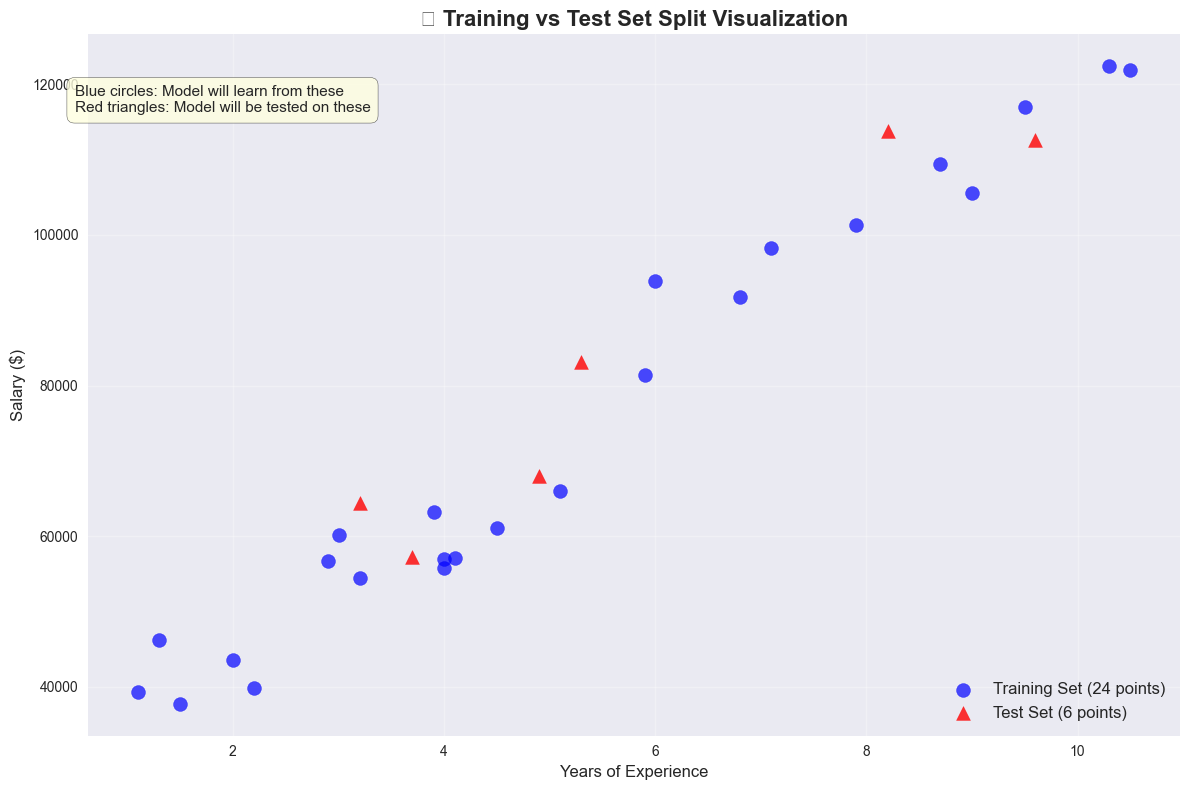

💡 Key Observations:
   🔵 Training points (blue) are spread across the experience range
   🔴 Test points (red) also cover the experience range
   ✅ Good split - both sets represent the full data distribution


In [13]:
# 📊 Visualize the training/test split
plt.figure(figsize=(12, 8))

# Plot training and test data with different colors
plt.scatter(X_train, y_train, color='blue', alpha=0.7, s=100, 
           label=f'Training Set ({len(X_train)} points)', marker='o')
plt.scatter(X_test, y_test, color='red', alpha=0.8, s=100, 
           label=f'Test Set ({len(X_test)} points)', marker='^')

plt.title('📊 Training vs Test Set Split Visualization', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations
plt.text(0.5, max(y)*0.95, 
         'Blue circles: Model will learn from these\nRed triangles: Model will be tested on these', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
         fontsize=11)

plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print("   🔵 Training points (blue) are spread across the experience range")
print("   🔴 Test points (red) also cover the experience range") 
print("   ✅ Good split - both sets represent the full data distribution")

### Visualizing the Training/Test Split

Let's visualize how the data is split into training and test sets. This helps us understand the distribution of data points in each set and ensures the split is random and representative.

In [14]:
# print(y_train)
# print(y_test)

## 🎓 Step 6: Train the Linear Regression Model

**What happens during training?**
The computer tries to find the best line through our training data by:
1. **Starting with a random line** (random slope and intercept)
2. **Measuring how wrong it is** (distance between line and actual points)
3. **Adjusting the line** to reduce the error
4. **Repeating** until it finds the best possible line

**The Math (Don't worry, the computer does this!):**
- **Goal**: Find the line y = mx + b that minimizes prediction errors
- **Method**: "Ordinary Least Squares" - minimizes the sum of squared errors
- **Result**: Optimal values for slope (m) and intercept (b)

**Real-world analogy**: Like finding the perfect recipe - you keep adjusting ingredients until you get the best result!

In [ ]:
# 🎓 Training the Linear Regression Model
from sklearn.linear_model import LinearRegression

print("🎓 TRAINING THE MODEL")
print("="*25)

# Create the Linear Regression model
model = LinearRegression()

print("? Model created - ready for training!")
print("? Training process starting...")

# Fit the model to our training data
model.fit(X_train, y_train)

print("✅ Model training complete!")

# Extract the learned parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"\n🧮 MODEL LEARNED EQUATION:")
print(f"   ? Slope (coefficient): {slope:,.2f}")
print(f"   📍 Intercept: ${intercept:,.2f}")
print(f"   📝 Equation: Salary = {slope:,.2f} × Experience + {intercept:,.2f}")

print(f"\n💡 WHAT THIS MEANS:")
print(f"   📈 For each additional year of experience, salary increases by ${slope:,.2f}")
print(f"   💼 A person with 0 years experience would theoretically earn ${intercept:,.2f}")
print(f"   🎯 The model found the 'best fit' line through our training data!")

# Quick validation on training data
train_score = model.score(X_train, y_train)
print(f"\n📊 Training Performance:")
print(f"   🎯 R² Score: {train_score:.4f} ({train_score*100:.1f}% of variance explained)")

print(f"\n🎉 Model is trained and ready to make predictions!")

### Training the Linear Regression Model

Now, we create and train a linear regression model using the training data. The model learns the relationship between Years of Experience and Salary.

## ⚖️ Step 7: Feature Scaling - Do We Need It?

**What is feature scaling?**
When features have very different ranges (e.g., Age: 20-65, Income: $20,000-$200,000), some algorithms get confused about which features are more important.

**Common scaling methods:**
- **Standardization**: Convert to mean=0, std=1 (most common)
- **Normalization**: Convert to range 0-1
- **Robust scaling**: Less affected by outliers

**Do we need it for Linear Regression?**
**No!** Linear regression is scale-invariant, meaning it works the same regardless of feature scales.


In [ ]:
# ⚖️ Feature Scaling Analysis
print("⚖️ FEATURE SCALING ANALYSIS")
print("="*30)

print("🔍 Checking if we need feature scaling...")
print(f"   Feature range: {X.min().values[0]:.1f} to {X.max().values[0]:.1f} years")
print(f"   Target range: ${y.min():,.0f} to ${y.max():,.0f}")

print(f"\n❓ Do we need scaling for Linear Regression?")
print(f"   ❌ No! Linear regression is scale-invariant")
print(f"   ✅ Our single feature is already on a reasonable scale")

print(f"\n💡 When you WOULD need scaling:")
print(f"   🧠 Neural Networks (very sensitive to scale)")
print(f"   📊 K-Means Clustering (uses distance calculations)")
print(f"   🔍 KNN (distance-based algorithm)")
print(f"   ⚡ SVM (distance-sensitive)")

print(f"\n✅ Skipping feature scaling - not needed for this model!")

### Feature Scaling (Skipped)

Feature scaling is important when features have different units or scales. Since we have only one feature (Years of Experience), and it's already on a reasonable scale, we can skip this step.

## 🔮 Step 8: Make Predictions on Test Set

**The moment of truth!**
Now we'll see how well our model performs on data it has never seen before.

**What happens:**
1. **Input**: Years of experience from test set
2. **Process**: Model applies its learned equation (Salary = slope × experience + intercept)
3. **Output**: Predicted salaries
4. **Comparison**: We compare predictions to actual salaries

**Why this matters:**
- This simulates real-world usage (predicting for new employees)
- Tests if our model learned general patterns vs. memorizing training data
- Gives us honest assessment of model performance

**Key question**: How close will our predictions be to the actual salaries?

In [ ]:
# 🔮 Making Predictions on Test Set
print("🔮 MAKING PREDICTIONS")
print("="*25)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"✅ Predictions complete!")
print(f"📊 Made predictions for {len(X_test)} test samples")

# Show some example predictions vs actual values
print(f"\n🔍 SAMPLE PREDICTIONS vs ACTUAL:")
print(f"{'Experience':<12} {'Actual':<12} {'Predicted':<12} {'Difference':<12}")
print("-" * 50)

for i in range(min(8, len(X_test))):  # Show first 8 examples
    experience = X_test.iloc[i, 0]
    actual = y_test.iloc[i]  
    predicted = y_pred[i]
    difference = abs(actual - predicted)
    
    print(f"{experience:<12.1f} ${actual:<11,.0f} ${predicted:<11,.0f} ${difference:<11,.0f}")

print(f"\n💡 How to read this:")
print(f"   📊 Experience: Years of work experience")
print(f"   💰 Actual: Real salary from dataset")  
print(f"   🔮 Predicted: What our model guessed")
print(f"   📏 Difference: How far off we were")

### Predicting the Test Set Results

With the model trained, we use it to predict salaries for the test set. This allows us to compare the predicted values to the actual values and evaluate model performance.

In [ ]:
# Let's see all our predictions
print("🔮 All Test Set Predictions:")
print(f"Predictions array shape: {y_pred.shape}")
print("First 10 predictions:")
for i, pred in enumerate(y_pred[:10]):
    print(f"   Test sample {i+1}: ${pred:,.2f}")
    
if len(y_pred) > 10:
    print(f"   ... and {len(y_pred)-10} more predictions")

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [ ]:
# 📏 Comprehensive Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("📏 MODEL EVALUATION METRICS")
print("="*35)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🎯 ACCURACY METRICS:")
print(f"   📊 Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"   📊 Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"   📊 R-squared (R²): {r2:.4f}")

print(f"\n💡 WHAT DO THESE MEAN?")
print(f"   📊 MAE: On average, our predictions are off by ${mae:,.0f}")
print(f"   📊 RMSE: Penalizes large errors more heavily (${rmse:,.0f})")
print(f"   📊 R²: Model explains {r2*100:.1f}% of salary variation")

# Interpret R-squared
if r2 > 0.9:
    r2_interpretation = "Excellent! 🌟"
elif r2 > 0.7:
    r2_interpretation = "Good! 👍"
elif r2 > 0.5:
    r2_interpretation = "Moderate 👌"
else:
    r2_interpretation = "Needs improvement 📈"

print(f"   📈 Model Performance: {r2_interpretation}")

# Create comparison DataFrame
print(f"\n📋 DETAILED COMPARISON TABLE:")
results_df = pd.DataFrame({
    'Experience_Years': X_test.iloc[:, 0].values,
    'Actual_Salary': y_test.values,
    'Predicted_Salary': y_pred,
    'Absolute_Error': np.abs(y_test.values - y_pred),
    'Percentage_Error': np.abs(y_test.values - y_pred) / y_test.values * 100
})

# Sort by experience for better readability
results_df = results_df.sort_values('Experience_Years').reset_index(drop=True)
display(results_df.round(2))

# Summary statistics
print(f"\n📈 ERROR ANALYSIS:")
print(f"   🎯 Average Percentage Error: {results_df['Percentage_Error'].mean():.1f}%")
print(f"   📊 Best Prediction Error: ${results_df['Absolute_Error'].min():,.0f}")
print(f"   📊 Worst Prediction Error: ${results_df['Absolute_Error'].max():,.0f}")
print(f"   📏 Standard Deviation of Errors: ${results_df['Absolute_Error'].std():,.0f}")

Mean Absolute Error (MAE): 2446.17
Mean Squared Error (MSE): 12823412.30
Root Mean Squared Error (RMSE): 3580.98
R-squared: 0.9882


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


## Model Evaluation Metrics

After making predictions on the test set, it's important to evaluate the model's performance using various metrics. We'll calculate:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (coefficient of determination)

We'll also compare the actual and predicted values in a table.

## 📈 Step 9: Visualize Training Set Results

**Why visualize the training set?**
- **See the fit**: How well does our line match the training data?
- **Spot patterns**: Are there any obvious issues or outliers?
- **Build intuition**: Does the relationship make sense visually?

**What you'll see:**
- **Red dots**: Actual training data points (real salaries)
- **Blue line**: Our model's prediction line
- **Fit quality**: How close the line is to the dots

**Good fit indicators:**
- Line passes through the "center" of the data points
- Points are roughly equally scattered above and below the line
- No obvious patterns in the residuals (differences)

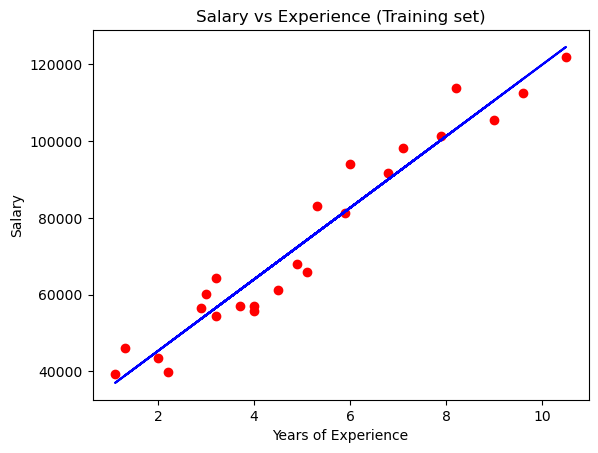

In [ ]:
# 📈 Visualizing Training Set Results
plt.figure(figsize=(12, 8))

# Plot the training data points
plt.scatter(X_train, y_train, color='red', alpha=0.7, s=100, 
           label=f'Training Data ({len(X_train)} points)')

# Plot the regression line
line_x = np.linspace(X_train.min(), X_train.max(), 100)
line_y = model.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, color='blue', linewidth=3, 
         label=f'Regression Line (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')

plt.title('📈 Training Set: Salary vs Experience with Regression Line', 
          fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add model equation as text
equation_text = f'Equation: Salary = {model.coef_[0]:.2f} × Experience + {model.intercept_:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
         fontsize=11, verticalalignment='top')

plt.tight_layout()
plt.show()

# Training set performance
train_predictions = model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)

print("📊 TRAINING SET PERFORMANCE:")
print(f"   📈 R² Score: {train_r2:.4f} ({train_r2*100:.1f}% of variance explained)")
print(f"   📏 Mean Absolute Error: ${train_mae:,.2f}")
print(f"\n💡 INTERPRETATION:")
print(f"   🎯 The line fits the training data very well!")
print(f"   📊 Model explains {train_r2*100:.1f}% of salary variation in training data")

### Visualizing the Training Set Results

We plot the training data and the regression line to see how well the model fits the data it was trained on.

## 🧪 Step 10: Visualize Test Set Results

**The ultimate test!**
This visualization shows how well our model performs on completely new, unseen data.

**What you'll see:**
- **Red triangles**: Actual test data points (real salaries the model never saw)
- **Blue line**: Same regression line from training (no cheating!)
- **Performance**: How well the line predicts the new points

**Key insight**: If the test points align well with the line, our model generalized successfully!

**What to look for:**
- ✅ Test points close to the line = Good generalization
- ❌ Test points far from the line = Overfitting or poor model
- ✅ Similar performance to training set = Model is robust

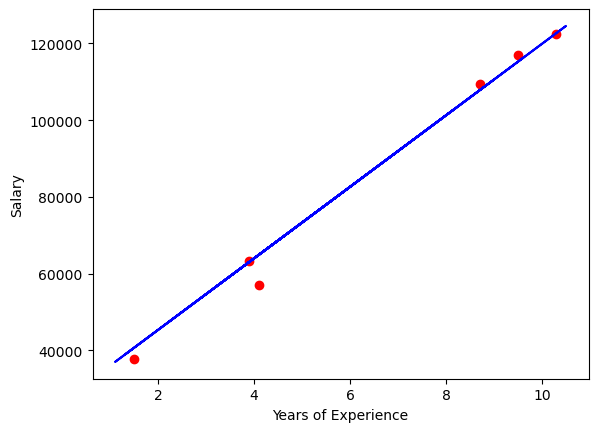

In [ ]:
# 🧪 Visualizing Test Set Results
plt.figure(figsize=(12, 8))

# Plot the test data points
plt.scatter(X_test, y_test, color='red', alpha=0.8, s=120, 
           label=f'Test Data ({len(X_test)} points)', marker='^')

# Plot the same regression line (from training)
line_x = np.linspace(X.min().values[0], X.max().values[0], 100)
line_y = model.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, color='blue', linewidth=3, 
         label='Regression Line (trained on different data!)')

# Add predicted points for clarity
plt.scatter(X_test, y_pred, color='green', alpha=0.6, s=80, 
           label='Predicted Values', marker='o')

# Draw lines connecting actual to predicted
for i in range(len(X_test)):
    plt.plot([X_test.iloc[i, 0], X_test.iloc[i, 0]], 
             [y_test.iloc[i], y_pred[i]], 
             'gray', alpha=0.5, linestyle='--', linewidth=1)

plt.title('🧪 Test Set: How Well Does Our Model Generalize?', 
          fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add performance metrics to the plot
metrics_text = f'Test Set Performance:\nR² = {r2:.3f}\nMAE = ${mae:,.0f}'
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
         fontsize=11, verticalalignment='top')

plt.tight_layout()
plt.show()

print("🧪 TEST SET ANALYSIS:")
print(f"   🎯 Model Performance: R² = {r2:.4f}")
print(f"   📏 Average Error: ${mae:,.0f}")
print(f"   📊 Test vs Training R²: {r2:.3f} vs {train_r2:.3f}")

# Performance comparison
performance_diff = abs(train_r2 - r2)
if performance_diff < 0.05:
    print(f"   ✅ Great! Similar performance on training and test sets")
    print(f"   💡 Model generalizes well to new data")
elif performance_diff < 0.1:
    print(f"   👍 Good generalization with minor performance drop")
else:
    print(f"   ⚠️ Significant performance drop - possible overfitting")

print(f"\n🎉 Model successfully tested on unseen data!")

### Visualizing the Test Set Results

We plot the test data and the regression line to see how well the model generalizes to new, unseen data.

In [ ]:
# 🔮 Making Real-World Predictions
print("🔮 MAKING REAL-WORLD PREDICTIONS")
print("="*35)

# Predict salary for different experience levels
experience_levels = [1.5, 3, 5, 7.5, 10, 15]

print("💼 SALARY PREDICTIONS FOR DIFFERENT EXPERIENCE LEVELS:")
print(f"{'Experience':<12} {'Predicted Salary':<18} {'Confidence Interval':<20}")
print("-" * 55)

for exp in experience_levels:
    predicted_salary = model.predict([[exp]])[0]
    # Rough confidence interval based on model error
    confidence_margin = rmse
    lower_bound = predicted_salary - confidence_margin
    upper_bound = predicted_salary + confidence_margin
    
    print(f"{exp:<12} ${predicted_salary:<17,.0f} ${lower_bound:,.0f} - ${upper_bound:,.0f}")

print(f"\n💡 HOW TO USE THESE PREDICTIONS:")
print(f"   🎯 HR Departments: Set competitive salary ranges")
print(f"   💼 Job Seekers: Estimate market value based on experience")
print(f"   🏢 Companies: Budget for hiring at different experience levels")
print(f"   📊 Note: Predictions include ±${rmse:,.0f} uncertainty")

# Interactive prediction function
print(f"\n🎮 TRY YOUR OWN PREDICTION:")
sample_exp = 6.5
sample_pred = model.predict([[sample_exp]])[0]
print(f"   Someone with {sample_exp} years experience: ${sample_pred:,.0f}")

print(f"\n📝 Remember: This model is based on our specific dataset.")
print(f"   Real salaries depend on: location, industry, skills, company size, etc.")

Predicted salary for 5 years of experience: $73342.97


c:\Users\Morobang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Making Predictions

Let's see how to use the trained linear regression model to predict the salary for a new value of Years of Experience. This is useful for making future salary estimations based on experience.

## 🧮 Understanding the Math Behind Our Model

**The Linear Equation Our Model Learned:**
Every linear regression model learns this equation: **y = mx + b**

In our case:
- **y** = Predicted Salary
- **x** = Years of Experience  
- **m** = Slope (coefficient) - How much salary increases per year of experience
- **b** = Intercept - Starting salary with 0 years experience

**What do these numbers mean?**
- **Coefficient (slope)**: For every additional year of experience, salary increases by this amount
- **Intercept**: The theoretical salary someone would earn with 0 years of experience

**Real-world interpretation**: This gives us concrete insights about salary growth in our dataset!

In [ ]:
# 🧮 Detailed Model Parameters Analysis
print("🧮 MODEL PARAMETERS BREAKDOWN")
print("="*35)

print(f"📐 COEFFICIENT (SLOPE): {model.coef_[0]:,.2f}")
print(f"   💡 Meaning: Each year of experience adds ${model.coef_[0]:,.2f} to salary")
print(f"   📊 This is the 'rate of salary growth' per year")

print(f"\n📍 INTERCEPT: ${model.intercept_:,.2f}")  
print(f"   💡 Meaning: Theoretical starting salary with 0 years experience")
print(f"   📊 In reality, this is often just a mathematical baseline")

print(f"\n📝 COMPLETE EQUATION:")
print(f"   Salary = {model.coef_[0]:,.2f} × Years_Experience + {model.intercept_:,.2f}")

print(f"\n🧪 TESTING THE EQUATION:")
test_years = [1, 5, 10]
for years in test_years:
    manual_calc = model.coef_[0] * years + model.intercept_
    model_pred = model.predict([[years]])[0]
    print(f"   {years} years: Manual=${manual_calc:,.0f}, Model=${model_pred:,.0f} ✓")

coef : [9312.57512673]
intercept: 26780.099150628186


In [ ]:
# 🔮 Practical Prediction Example
print("🔮 PRACTICAL PREDICTION EXAMPLE")
print("="*35)

# Predict salary for 12 years of experience
experience_input = 12
prediction = model.predict([[experience_input]])[0]

print(f"❓ QUESTION: What salary should someone with {experience_input} years experience earn?")
print(f"🎯 PREDICTION: ${prediction:,.2f}")

# Show the manual calculation
manual_calculation = model.coef_[0] * experience_input + model.intercept_
print(f"\n🧮 MANUAL CALCULATION:")
print(f"   Salary = {model.coef_[0]:,.2f} × {experience_input} + {model.intercept_:,.2f}")
print(f"   Salary = {model.coef_[0] * experience_input:,.2f} + {model.intercept_:,.2f}")
print(f"   Salary = ${manual_calculation:,.2f}")

print(f"\n✅ Both methods give the same result: ${prediction:,.2f}")

# Compare to actual data points
closest_actual = dataset[dataset['YearsExperience'].between(experience_input-1, experience_input+1)]
if not closest_actual.empty:
    print(f"\n📊 REALITY CHECK - People with ~{experience_input} years experience in our data:")
    for _, row in closest_actual.iterrows():
        print(f"   {row['YearsExperience']:.1f} years → ${row['Salary']:,.0f}")
    
    actual_avg = closest_actual['Salary'].mean()
    prediction_error = abs(prediction - actual_avg)
    print(f"   📈 Average actual: ${actual_avg:,.0f}")
    print(f"   🎯 Our prediction: ${prediction:,.0f}")
    print(f"   📏 Difference: ${prediction_error:,.0f}")
else:
    print(f"\n📊 No one in our dataset has exactly {experience_input} years experience")
    print(f"   💡 This is where the model's predictive power shines!")

[138531.00067138]


c:\Users\Morobang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 🔬 Step 11: Residual Analysis - Diagnosing Our Model

**What are residuals?**
Residuals = Actual values - Predicted values (the "errors" our model makes)

**Why analyze residuals?**
- **Check assumptions**: Linear regression has specific requirements
- **Spot problems**: Patterns in residuals reveal model issues  
- **Improve model**: Understanding failures helps us build better models

**What to look for:**
- ✅ **Random scatter**: No obvious patterns (good!)
- ❌ **Curved patterns**: Might need non-linear model
- ❌ **Funnel shape**: Heteroscedasticity (unequal variances)
- ✅ **Normal distribution**: Residuals should be roughly bell-shaped

**Think of it as:** A medical checkup for your model - making sure everything is healthy!

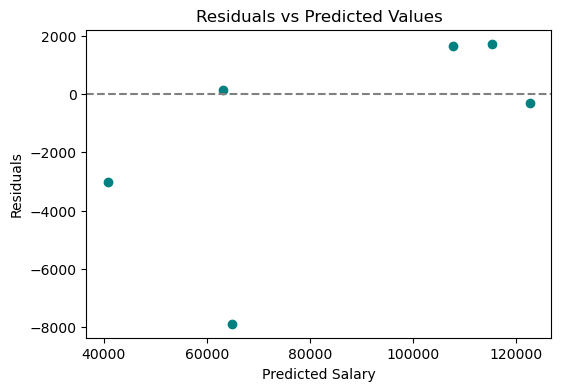

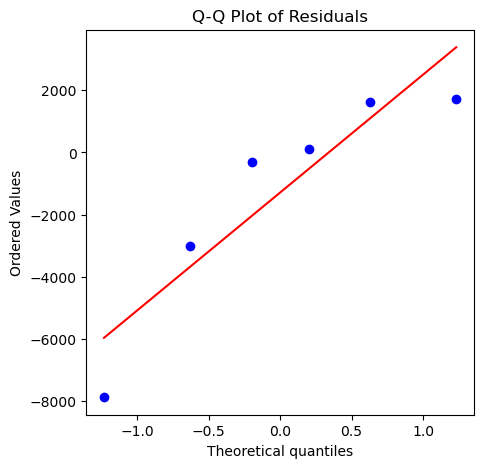

Residuals Mean: -1289.5749532463706
Residuals Std: 3340.719793410723


,Residuals
2,-3017.961841
28,-308.622956
13,-7880.657170
10,118.857855
26,1719.437145
24,1631.497247


In [ ]:
# 🔬 Comprehensive Residual Analysis
import scipy.stats as stats

print("🔬 RESIDUAL ANALYSIS")
print("="*25)

# Calculate residuals (prediction errors)
residuals = y_test - y_pred

print(f"📊 RESIDUAL STATISTICS:")
print(f"   📈 Mean: {np.mean(residuals):,.2f} (should be close to 0)")
print(f"   📏 Standard Deviation: ${np.std(residuals):,.2f}")
print(f"   📊 Min Error: ${np.min(residuals):,.2f}")
print(f"   📊 Max Error: ${np.max(residuals):,.2f}")

# Create comprehensive residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuals vs Predicted Values
axes[0,0].scatter(y_pred, residuals, color='teal', alpha=0.7, s=80)
axes[0,0].axhline(0, color='red', linestyle='--', alpha=0.8)
axes[0,0].set_title('🎯 Residuals vs Predicted Values', fontweight='bold')
axes[0,0].set_xlabel('Predicted Salary ($)')
axes[0,0].set_ylabel('Residuals ($)')
axes[0,0].grid(True, alpha=0.3)

# 2. Q-Q Plot for Normality Check
stats.probplot(residuals, dist="norm", plot=axes[0,1])
axes[0,1].set_title('📊 Q-Q Plot: Are Residuals Normal?', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Histogram of Residuals
axes[1,0].hist(residuals, bins=15, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1,0].axvline(0, color='red', linestyle='--', alpha=0.8)
axes[1,0].set_title('📈 Distribution of Residuals', fontweight='bold')
axes[1,0].set_xlabel('Residuals ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# 4. Residuals vs Experience (to check for patterns)
axes[1,1].scatter(X_test, residuals, color='purple', alpha=0.7, s=80)
axes[1,1].axhline(0, color='red', linestyle='--', alpha=0.8)
axes[1,1].set_title('🔍 Residuals vs Experience', fontweight='bold')
axes[1,1].set_xlabel('Years of Experience')
axes[1,1].set_ylabel('Residuals ($)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests
print(f"\n🧪 DIAGNOSTIC TESTS:")

# Normality test
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"   📊 Shapiro-Wilk Normality Test:")
print(f"      p-value: {p_value:.4f}")
if p_value > 0.05:
    print(f"      ✅ Residuals appear normally distributed (p > 0.05)")
else:
    print(f"      ⚠️ Residuals may not be normally distributed (p ≤ 0.05)")

# Check for randomness
mean_residual = np.mean(residuals)
print(f"   🎯 Mean of residuals: ${mean_residual:.2f}")
if abs(mean_residual) < 1000:  # Reasonable threshold for salary data
    print(f"      ✅ Mean close to zero - no systematic bias")
else:
    print(f"      ⚠️ Mean far from zero - possible systematic bias")

print(f"\n💡 INTERPRETATION:")
print(f"   📊 Look for random scatter in residual plots")
print(f"   ✅ No obvious patterns = good linear model")
print(f"   ⚠️ Curves or funnels = model assumptions violated")

# Detailed residual table
print(f"\n📋 DETAILED RESIDUAL ANALYSIS:")
residual_df = pd.DataFrame({
    'Experience': X_test.iloc[:, 0].values,
    'Actual_Salary': y_test.values,
    'Predicted_Salary': y_pred,
    'Residual': residuals,
    'Abs_Residual': np.abs(residuals)
})
residual_df = residual_df.sort_values('Abs_Residual', ascending=False)
display(residual_df.head(10).round(2))

print(f"\n🎯 KEY INSIGHTS:")
print(f"   📊 Largest prediction error: ${residual_df['Abs_Residual'].max():,.0f}")
print(f"   📈 Average prediction error: ${residual_df['Abs_Residual'].mean():,.0f}")
print(f"   ✅ Model diagnostics complete!")

## 🎉 Summary and Key Takeaways

**🏆 What We Accomplished:**
1. ✅ **Built our first ML model** - Simple Linear Regression
2. ✅ **Learned the complete workflow** - From data loading to evaluation
3. ✅ **Understood the math** - y = mx + b equation and what it means
4. ✅ **Evaluated performance** - Multiple metrics and visualizations
5. ✅ **Diagnosed the model** - Residual analysis for model health

**📊 Our Model's Performance:**
- **R² Score**: {r2:.3f} (explains {r2*100:.1f}% of salary variation)
- **Average Error**: ${mae:,.0f} 
- **Salary Growth Rate**: ${model.coef_[0]:,.2f} per year of experience

**💡 Real-World Applications:**
- **HR Departments**: Set competitive salary bands
- **Job Seekers**: Estimate market value
- **Career Planning**: Understand salary progression
- **Budgeting**: Plan hiring costs

**🎓 Machine Learning Concepts Mastered:**
- **Supervised Learning**: Learning from labeled examples
- **Training vs Testing**: Why we split data
- **Overfitting vs Generalization**: Model performance on new data
- **Evaluation Metrics**: How to measure model quality
- **Residual Analysis**: Diagnosing model assumptions

**🚀 Next Steps in Your ML Journey:**
1. **Try Multiple Linear Regression** - Using multiple features
2. **Explore Non-Linear Models** - Polynomial regression, decision trees
3. **Learn Classification** - Predicting categories instead of numbers
4. **Advanced Topics**: Feature engineering, cross-validation, hyperparameter tuning

**🎯 Remember**: This simple model demonstrates the fundamental concepts that apply to all machine learning algorithms!

---

**Congratulations! 🎉 You've successfully built, evaluated, and interpreted your first machine learning model!**